In [7]:
import pandas as pd
temp_rain_soil = pd.read_csv("../../AucklandCouncilOpenData_08June24/temp_rain_soil_Auckland_2015-10-21to2024-06-08.csv", index_col='Timestamp (UTC+12:00)', parse_dates=True)
temp_rain_soil.head()

,Temp,Rain(mm),SoilMoist,SoilTemp
Timestamp (UTC+12:00),,,,
2018-07-07 11:00:00,14.0,0.0,37.51600,10.400
2018-07-07 12:00:00,15.0,0.0,37.52375,10.600
2018-07-07 13:00:00,16.0,0.0,37.57200,10.700
2018-07-07 14:00:00,16.0,0.0,37.34300,10.725
2018-07-07 15:00:00,16.0,0.0,37.35050,10.950


In [8]:
temp_rain_soil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44946 entries, 2018-07-07 11:00:00 to 2023-08-23 04:00:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Temp       44946 non-null  float64
 1   Rain(mm)   44946 non-null  float64
 2   SoilMoist  44946 non-null  float64
 3   SoilTemp   44946 non-null  float64
dtypes: float64(4)
memory usage: 1.7 MB


# Cross-Correlation Analysis
- how long it takes for a change in one variable to affect another

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf


def plot_combined_cross_correlation(series_list, labels, lags, title, zoom_start=None, zoom_end=None):
    plt.figure(figsize=(12, 6))
    
    for i, (series1, series2) in enumerate(series_list):
        ccf_values = ccf(series1, series2, adjusted=True) 
        optimal_lag = np.argmax(np.abs(ccf_values))
        max_correlation = ccf_values[optimal_lag]
        
        # Calculate lag in hours
        lag_hours = np.arange(-lags, lags + 1)
        lag_days = lag_hours / 24.0  
        
        start_idx = len(ccf_values) // 2 - lags
        end_idx = len(ccf_values) // 2 + lags + 1
        ccf_values = ccf_values[start_idx:end_idx]
        
        # Plot the cross-correlation
        plt.plot(lag_days[:len(ccf_values)], ccf_values, marker='o', label=f'{labels[i]} (Optimal Lag: {optimal_lag} hours), Max Correlation: {max_correlation:.2f}')
    
    plt.xlabel('Lag (days)')
    plt.ylabel('Cross-correlation')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

Checking if Temperature is Increasing as a Trend

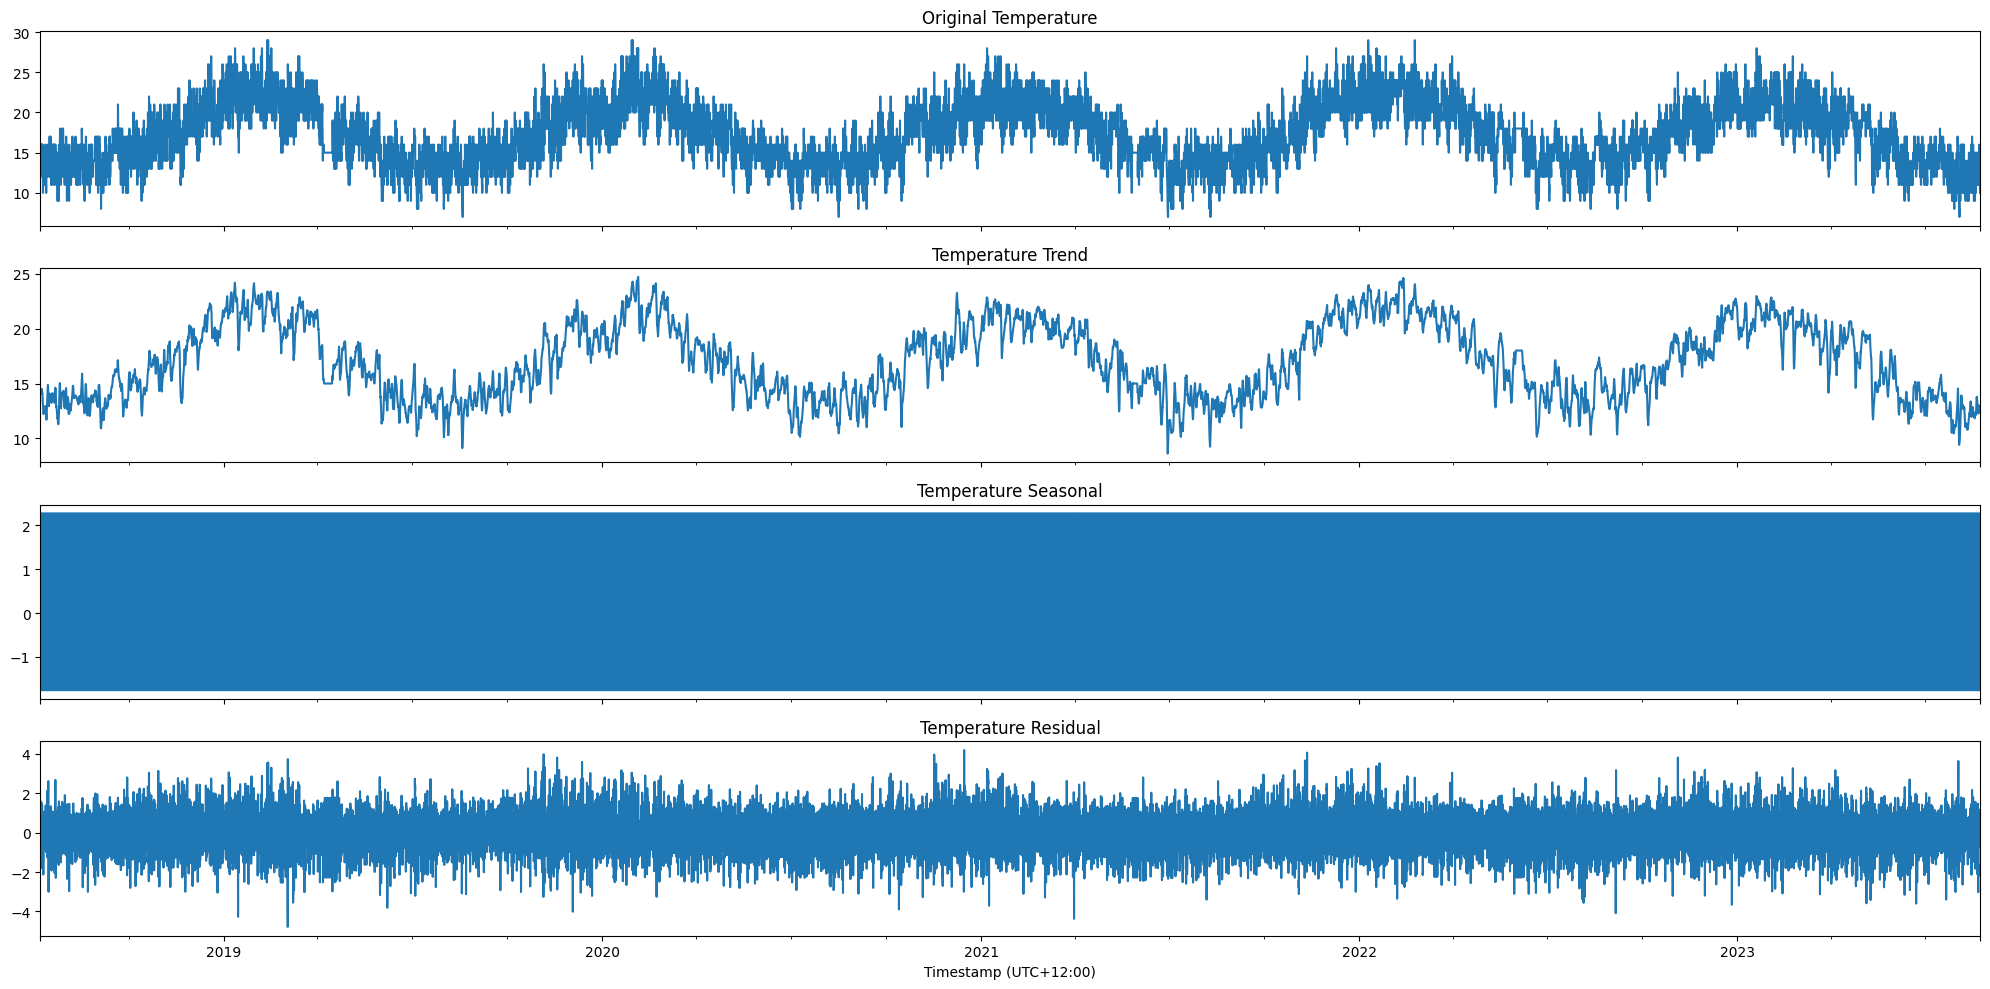

In [10]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

decomposition = sm.tsa.seasonal_decompose(temp_rain_soil['Temp'], model='additive')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 10), sharex=True)

decomposition.observed.plot(ax=ax1, title='Original Temperature')
decomposition.trend.plot(ax=ax2, title='Temperature Trend')
decomposition.seasonal.plot(ax=ax3, title='Temperature Seasonal')
decomposition.resid.plot(ax=ax4, title='Temperature Residual')

plt.tight_layout()
plt.show()

the rolling mean or moving average to smooth out the data and visualize the seasonal pattern more clearly.

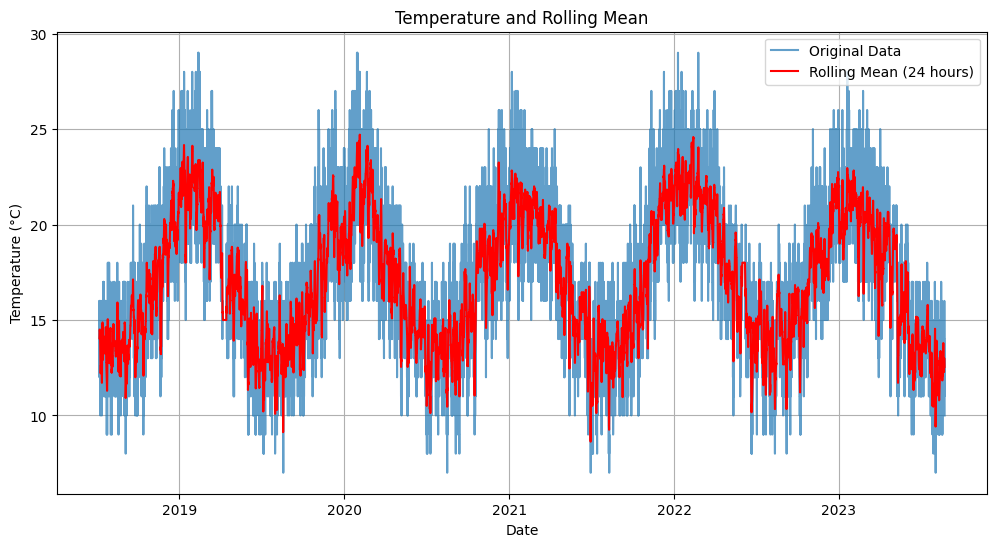

In [11]:
rolling_mean = temp_rain_soil['Temp'].rolling(window=24, center=True).mean()
plt.figure(figsize=(12, 6))
plt.plot(temp_rain_soil['Temp'], label='Original Data', alpha=0.7)
plt.plot(rolling_mean, color='red', label='Rolling Mean (24 hours)')
plt.title('Temperature and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

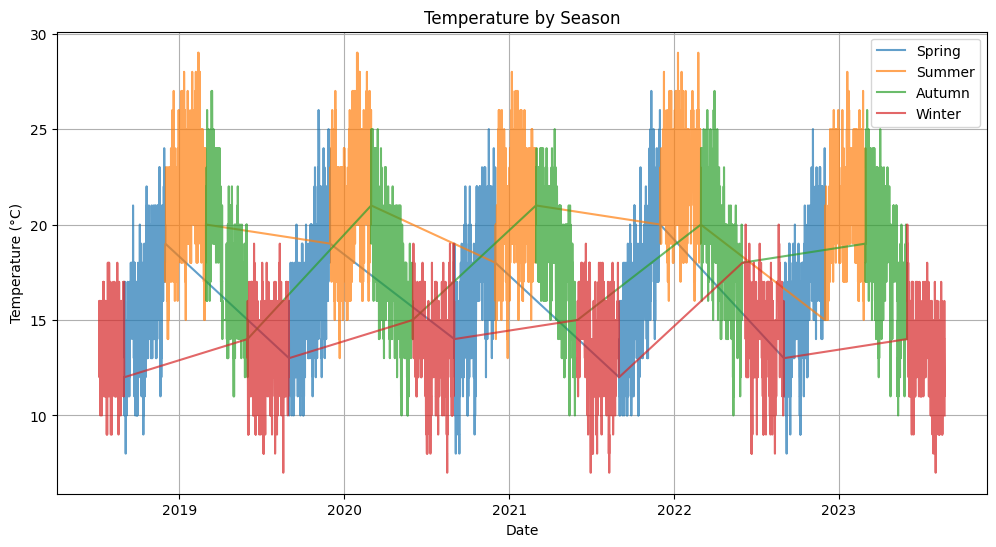

In [12]:
# Seasonal Subsetting
spring_data = temp_rain_soil[(temp_rain_soil.index.month >= 9) & (temp_rain_soil.index.month <= 11)]['Temp']
summer_data = temp_rain_soil[(temp_rain_soil.index.month >= 12) | (temp_rain_soil.index.month <= 2)]['Temp']
autumn_data = temp_rain_soil[(temp_rain_soil.index.month >= 3) & (temp_rain_soil.index.month <= 5)]['Temp']
winter_data = temp_rain_soil[(temp_rain_soil.index.month >= 6) & (temp_rain_soil.index.month <= 8)]['Temp']

plt.figure(figsize=(12, 6))
plt.plot(spring_data, label='Spring', alpha=0.7)
plt.plot(summer_data, label='Summer', alpha=0.7)
plt.plot(autumn_data, label='Autumn', alpha=0.7)
plt.plot(winter_data, label='Winter', alpha=0.7)
plt.title('Temperature by Season')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

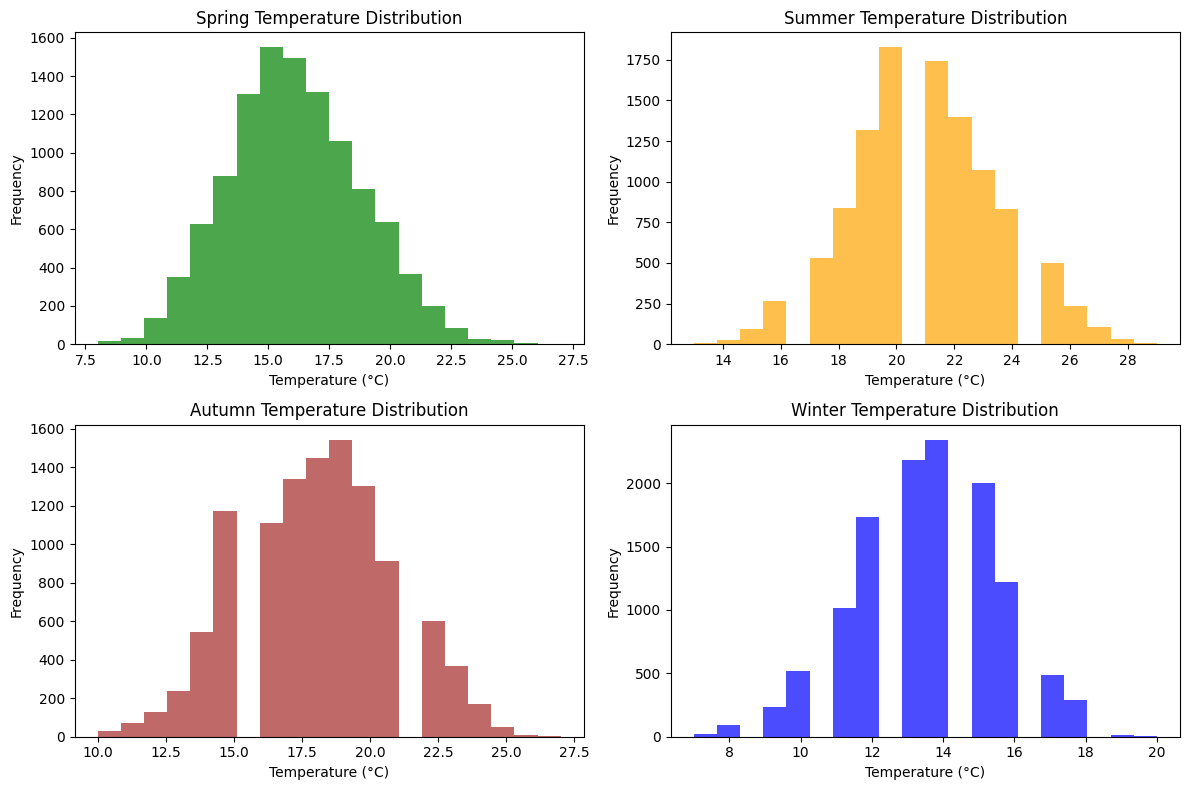

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(spring_data, bins=20, color='green', alpha=0.7)
plt.title('Spring Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(summer_data, bins=20, color='orange', alpha=0.7)
plt.title('Summer Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(autumn_data, bins=20, color='brown', alpha=0.7)
plt.title('Autumn Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(winter_data, bins=20, color='blue', alpha=0.7)
plt.title('Winter Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Rainfall Distribution by Season


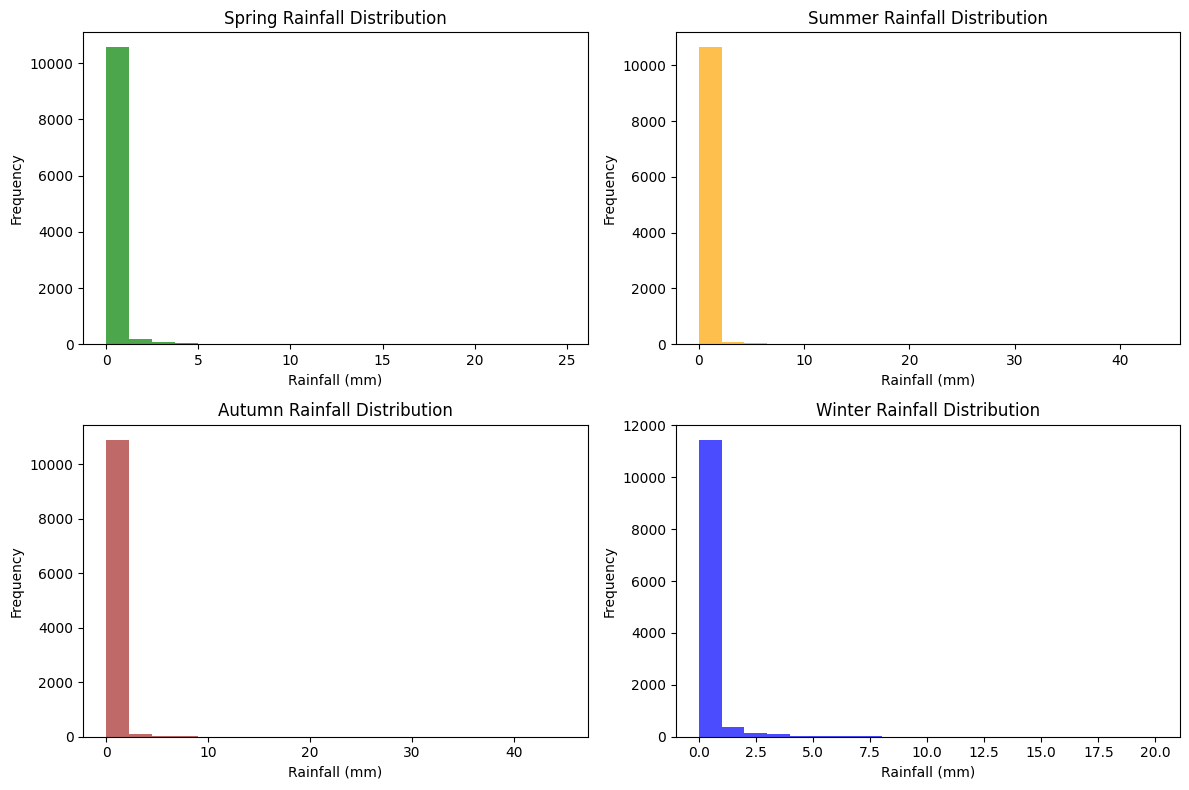

In [14]:
spring_rain = temp_rain_soil[temp_rain_soil.index.month.isin([9, 10, 11])]['Rain(mm)']
summer_rain = temp_rain_soil[temp_rain_soil.index.month.isin([12, 1, 2])]['Rain(mm)']
autumn_rain = temp_rain_soil[temp_rain_soil.index.month.isin([3, 4, 5])]['Rain(mm)']
winter_rain = temp_rain_soil[temp_rain_soil.index.month.isin([6, 7, 8])]['Rain(mm)']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(spring_rain, bins=20, color='green', alpha=0.7)
plt.title('Spring Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(summer_rain, bins=20, color='orange', alpha=0.7)
plt.title('Summer Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(autumn_rain, bins=20, color='brown', alpha=0.7)
plt.title('Autumn Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(winter_rain, bins=20, color='blue', alpha=0.7)
plt.title('Winter Rainfall Distribution')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Soil Moisture Distribution by Season


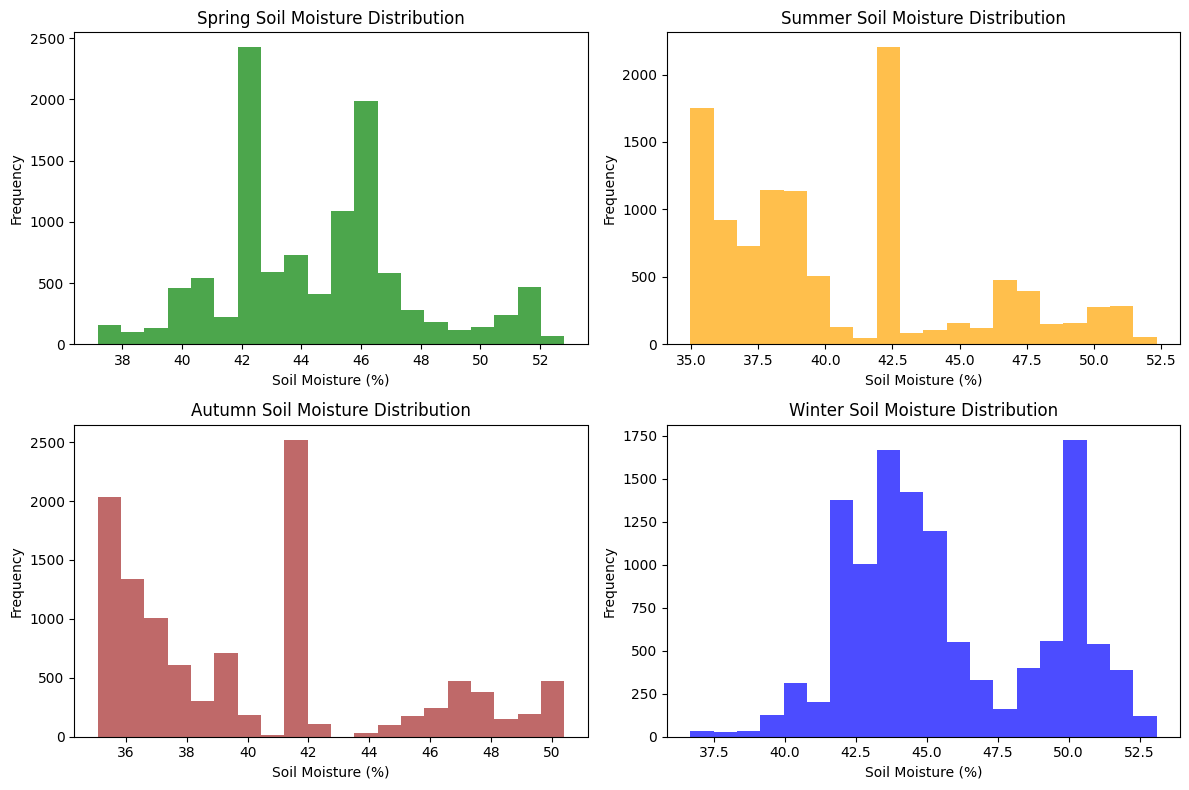

In [15]:
spring_soil_moisture = temp_rain_soil[temp_rain_soil.index.month.isin([9, 10, 11])]['SoilMoist']
summer_soil_moisture = temp_rain_soil[temp_rain_soil.index.month.isin([12, 1, 2])]['SoilMoist']
autumn_soil_moisture = temp_rain_soil[temp_rain_soil.index.month.isin([3, 4, 5])]['SoilMoist']
winter_soil_moisture = temp_rain_soil[temp_rain_soil.index.month.isin([6, 7, 8])]['SoilMoist']

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(spring_soil_moisture, bins=20, color='green', alpha=0.7)
plt.title('Spring Soil Moisture Distribution')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(summer_soil_moisture, bins=20, color='orange', alpha=0.7)
plt.title('Summer Soil Moisture Distribution')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(autumn_soil_moisture, bins=20, color='brown', alpha=0.7)
plt.title('Autumn Soil Moisture Distribution')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(winter_soil_moisture, bins=20, color='blue', alpha=0.7)
plt.title('Winter Soil Moisture Distribution')
plt.xlabel('Soil Moisture (%)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

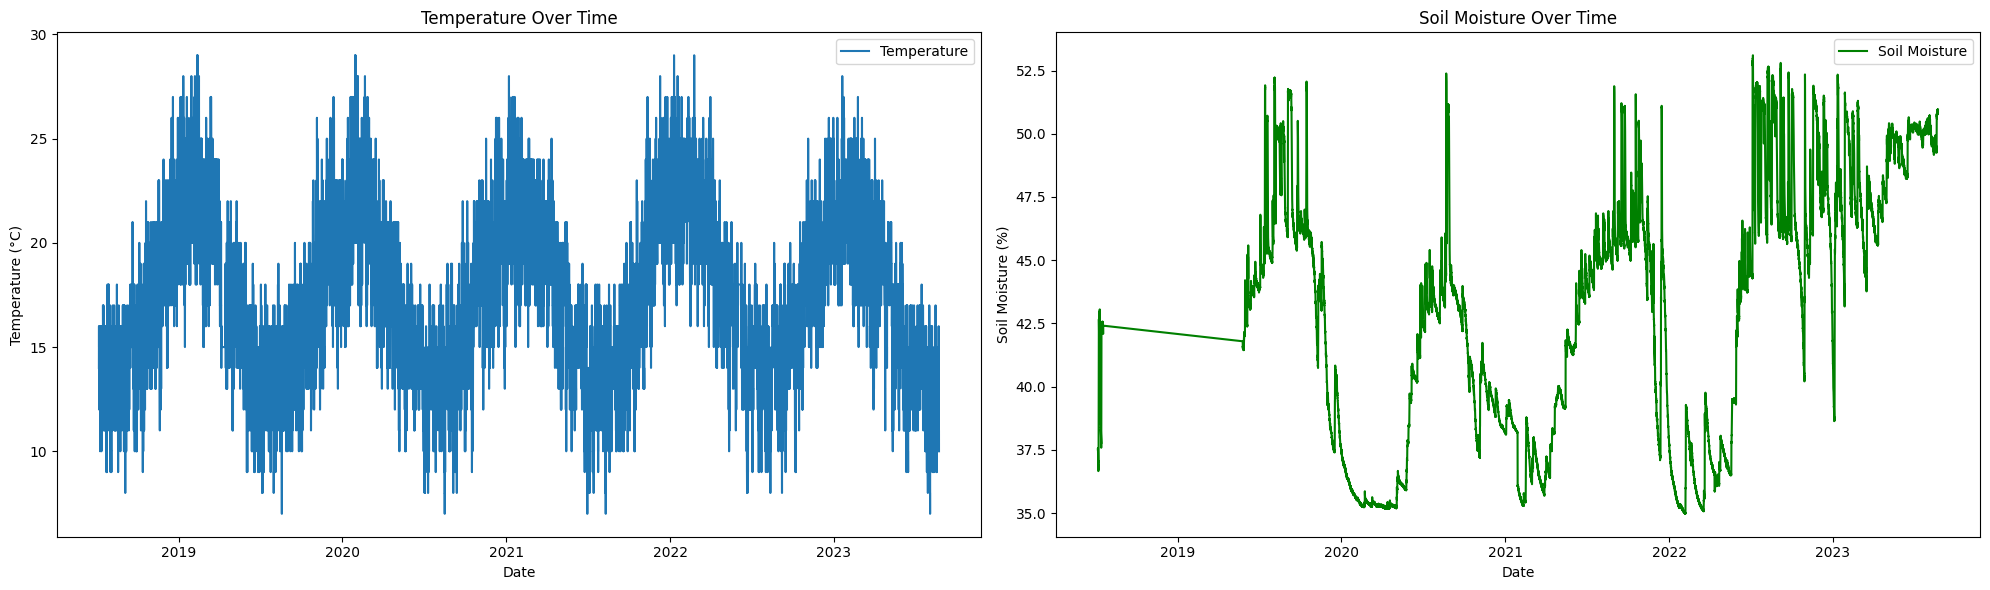

In [16]:
plt.figure(figsize=(20, 6))

# Line plot for temperature
plt.subplot(1, 2, 1)
plt.plot(temp_rain_soil['Temp'], label='Temperature')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

# Line plot for soil moisture
plt.subplot(1, 2, 2)
plt.plot(temp_rain_soil['SoilMoist'], label='Soil Moisture', color='green')
plt.title('Soil Moisture Over Time')
plt.xlabel('Date')
plt.ylabel('Soil Moisture (%)')
plt.legend()

plt.tight_layout()
plt.show()

How Temperature Affects Rainfall - the correlation between temperature and rainfall.

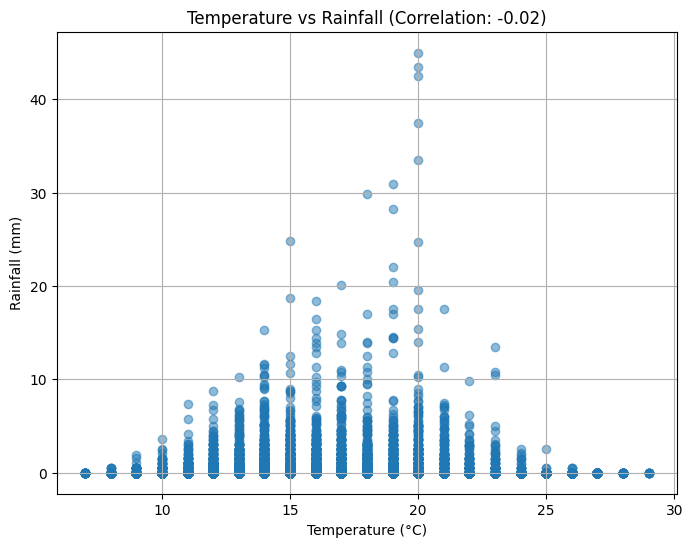

In [17]:
correlation_temp_rain = temp_rain_soil['Temp'].corr(temp_rain_soil['Rain(mm)'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp_rain_soil['Temp'], temp_rain_soil['Rain(mm)'], alpha=0.5)
plt.title(f'Temperature vs Rainfall (Correlation: {correlation_temp_rain:.2f})')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

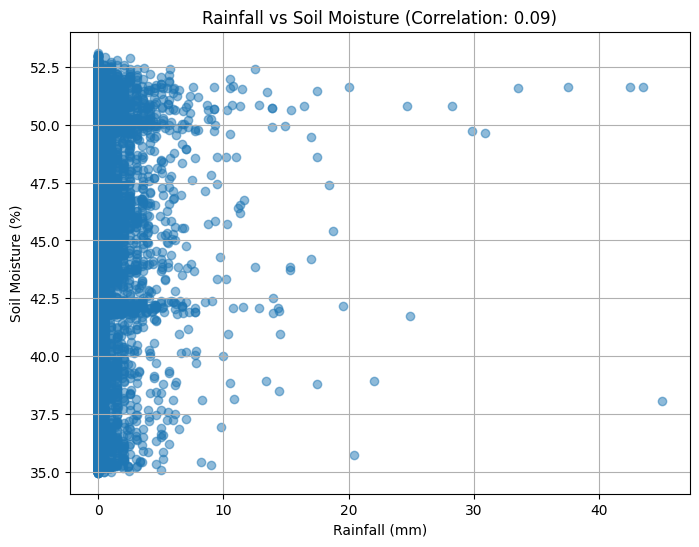

In [18]:
correlation_temp_rain = temp_rain_soil['Rain(mm)'].corr(temp_rain_soil['SoilMoist'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp_rain_soil['Rain(mm)'], temp_rain_soil['SoilMoist'], alpha=0.5)
plt.title(f'Rainfall vs Soil Moisture (Correlation: {correlation_temp_rain:.2f})')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.show()

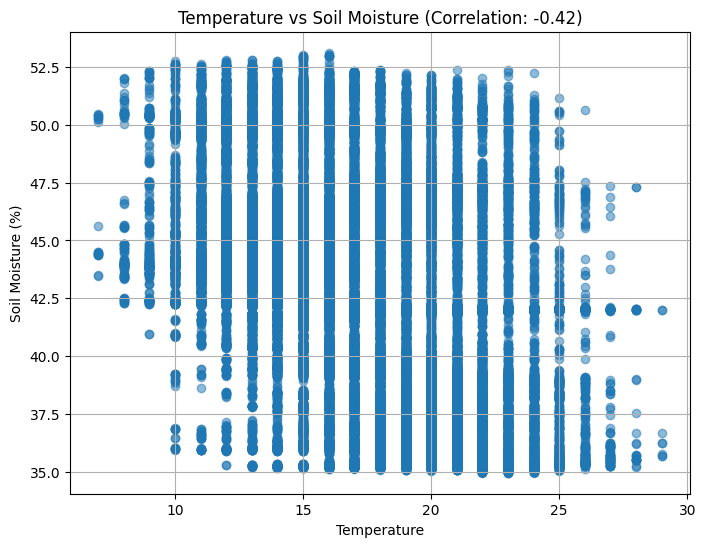

In [20]:
correlation_temp_rain = temp_rain_soil['Temp'].corr(temp_rain_soil['SoilMoist'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp_rain_soil['Temp'], temp_rain_soil['SoilMoist'], alpha=0.5)
plt.title(f'Temperature vs Soil Moisture (Correlation: {correlation_temp_rain:.2f})')
plt.xlabel('Temperature')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.show()

Soil Moisture Response to Rainfall

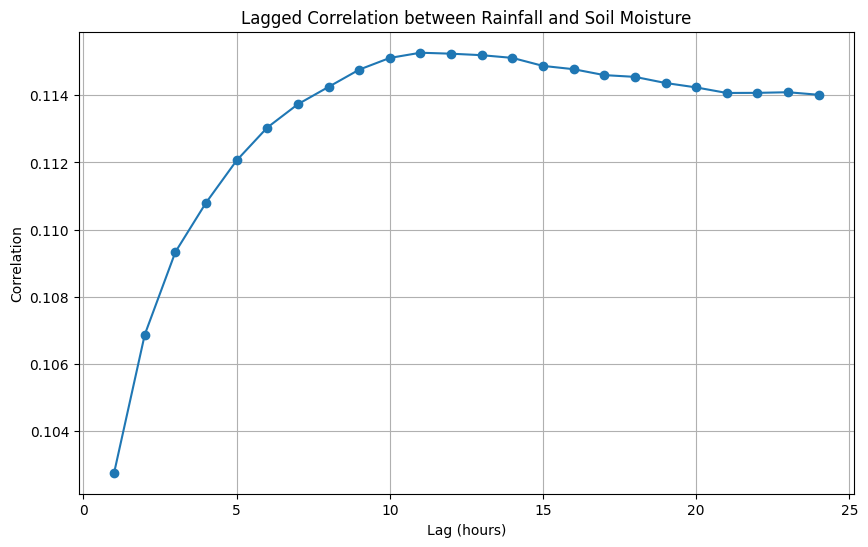

In [19]:
lags = range(1, 25)  # Lags from 1 to 24 hours
correlations = [temp_rain_soil['Rain(mm)'].shift(lag).corr(temp_rain_soil['SoilMoist']) for lag in lags]

plt.figure(figsize=(10, 6))
plt.plot(lags, correlations, marker='o')
plt.title('Lagged Correlation between Rainfall and Soil Moisture')
plt.xlabel('Lag (hours)')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

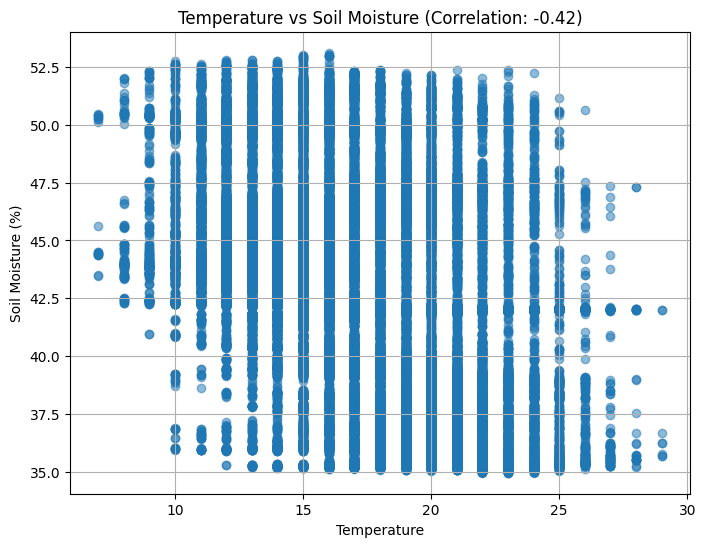

Pearson correlation coefficient: -0.42


In [21]:
# Calculate correlation coefficient
correlation_temp_soil = temp_rain_soil['Temp'].corr(temp_rain_soil['SoilMoist'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temp_rain_soil['Temp'], temp_rain_soil['SoilMoist'], alpha=0.5)
plt.title(f'Temperature vs Soil Moisture (Correlation: {correlation_temp_soil:.2f})')
plt.xlabel('Temperature')
plt.ylabel('Soil Moisture (%)')
plt.grid(True)
plt.show()

print(f"Pearson correlation coefficient: {correlation_temp_soil:.2f}")